In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from stop_words import get_stop_words

In [3]:
stop_words = get_stop_words(language='en') # import stop words

In [121]:
data_1 = pd.read_csv('dataset/spam.csv') # kaggle dataset

In [122]:
data_1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [123]:
data_1.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [124]:
data_1.columns = ["spam","text"]

In [125]:
data_1.spam = data_1.spam.apply(lambda x:0 if x=='ham' else 1)

In [126]:
data = data_1.copy()

In [127]:
data

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [128]:
data.drop_duplicates(inplace=True) # drop duplicated elements
data.dropna(inplace=True) # delete null elements

<BarContainer object of 2 artists>

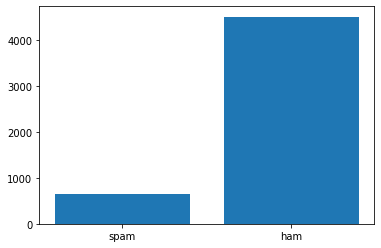

In [129]:
plt.bar(['spam','ham'],[len(data[data.spam == 1]),len(data[data.spam == 0])]) # show the propotion of each class

## Preprocess data

In [131]:
from string import punctuation
import re
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text) # keep only words and space ( remove punctuation + remove weried characters)
    text = text.strip() # remove starting spaces and ending spaces
    tokens = text.split(' ') # tokenize
    return [w.lower() for w in tokens if w not in stop_words and w!=''] # remove stop words and spaces

# Text to matrix of tokens counts

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

In [133]:
# make a matrix of tokens counts based on the dataset
countVectorizer = CountVectorizer(analyzer=preprocess)
messages = countVectorizer.fit_transform(data.text)

## split data into train , test and validation

In [134]:
len(data[data.spam==0])/len(data[data.spam==1]) # check propotion of class Vs 0 comparing to class 1

6.915773353751915

In [212]:
from sklearn.model_selection import train_test_split
X = messages
y = data.spam
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) # split the data into train and test

In [213]:
X_train.shape[0] , X_test.shape[0]

(4135, 1034)

The propotion of class 0 comparing to class 1 is reserved because we used stratified sampling to split our dataset

In [214]:
len(y[y==0])/len(y[y==1]) 

6.915773353751915

In [215]:
len(y_train[y_train==0])/len(y_train[y_train==1]) 

6.921455938697318

In [216]:
len(y_val[y_val==0])/len(y_val[y_val==1]) 

6.893129770992366

# model training

## Naive Bayes

In [217]:
from sklearn.naive_bayes import MultinomialNB

In [218]:
NB = MultinomialNB()

In [219]:
model = NB.fit(X_train,y_train)

In [220]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [221]:
pred = model.predict(X_train)

In [222]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3613
           1       0.98      0.97      0.97       522

    accuracy                           0.99      4135
   macro avg       0.99      0.98      0.98      4135
weighted avg       0.99      0.99      0.99      4135



In [223]:
print("Confusion Matrix: \n", confusion_matrix(y_train,pred))

Confusion Matrix: 
 [[3603   10]
 [  18  504]]


In [224]:
print("Accuracy: \n", accuracy_score(y_train,pred))

Accuracy: 
 0.9932285368802902


#### Test

In [225]:
pred_test = model.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       903
           1       0.90      0.92      0.91       131

    accuracy                           0.98      1034
   macro avg       0.94      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [226]:
print("Confusion Matrix: \n", confusion_matrix(y_test,pred_test))

Confusion Matrix: 
 [[889  14]
 [ 11 120]]


In [227]:
print("Accuracy: \n", accuracy_score(y_test,pred_test))

Accuracy: 
 0.9758220502901354


## SVM

In [191]:
from sklearn import svm

In [192]:
classfier = svm.SVC(kernel='linear')

In [193]:
model = classfier.fit(X_train,y_train)

In [194]:
pred = model.predict(X_train)

In [228]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3613
           1       0.98      0.97      0.97       522

    accuracy                           0.99      4135
   macro avg       0.99      0.98      0.98      4135
weighted avg       0.99      0.99      0.99      4135



In [229]:
print("Confusion Matrix: \n", confusion_matrix(y_train, pred))

Confusion Matrix: 
 [[3603   10]
 [  18  504]]


In [230]:
print("Accuracy: \n", accuracy_score(y_train, pred))

Accuracy: 
 0.9932285368802902


#### Test

In [231]:
pred_test = model.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       903
           1       0.90      0.92      0.91       131

    accuracy                           0.98      1034
   macro avg       0.94      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [232]:
print("Confusion Matrix: \n", confusion_matrix(y_test,pred_test))

Confusion Matrix: 
 [[889  14]
 [ 11 120]]


In [233]:
print("Accuracy: \n", accuracy_score(y_test,pred_test))

Accuracy: 
 0.9758220502901354


## Logistic regression

In [234]:
from sklearn.linear_model import LogisticRegression

In [235]:
logisticRegression = LogisticRegression()

In [236]:
model = logisticRegression.fit(X_train,y_train)

In [237]:
pred_val = model.predict(X_train)

In [238]:
print(classification_report(y_train,pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3613
           1       1.00      0.97      0.99       522

    accuracy                           1.00      4135
   macro avg       1.00      0.99      0.99      4135
weighted avg       1.00      1.00      1.00      4135



In [239]:
print(confusion_matrix(y_train,pred_val))

[[3613    0]
 [  15  507]]


In [240]:
print(accuracy_score(y_train,pred_val))

0.9963724304715841


#### Test

In [241]:
pred_test = model.predict(X_test)

In [242]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.96      0.82      0.89       131

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [243]:
print(confusion_matrix(y_test,pred_test))

[[899   4]
 [ 23 108]]


In [244]:
print(accuracy_score(y_test,pred_test))

0.9738878143133463
